In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0-rc0'

In [4]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import data_tools

### Test our data_tools.py methods on a test image

In [5]:
test_filename = 'output1.tif'

test_data = data_tools.read_raster(test_filename)

In [6]:
test_data[0]

array([[18,  4,  7, ..., 29, 32, 36],
       [24, 10, 12, ..., 32, 32, 33],
       [27, 12, 13, ..., 35, 32, 30],
       ...,
       [20, 29, 27, ..., 24, 25, 22],
       [27, 35, 28, ..., 24, 26, 25],
       [41, 44, 30, ..., 24, 27, 27]], dtype=uint8)

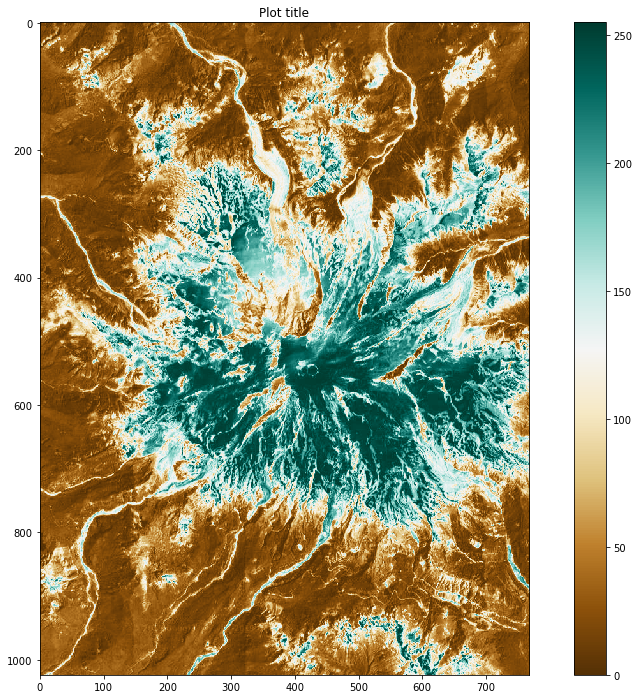

In [7]:
data_tools.plot_me(test_data[0], cmap='BrBG')

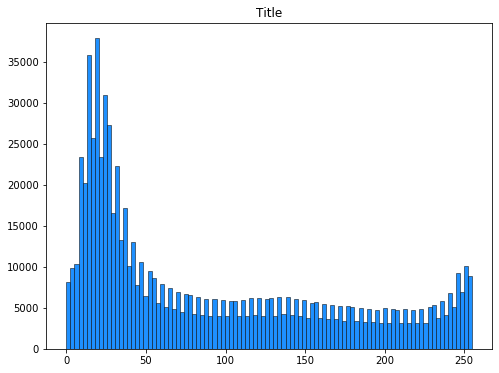

In [8]:
data_tools.histo_me(test_data[0])

In [9]:
mask = np.zeros(np.shape(test_data[0]))

In [10]:
print(np.shape(mask))

(1024, 768)


In [11]:
mask[np.where(test_data[0] > 180)] = 1

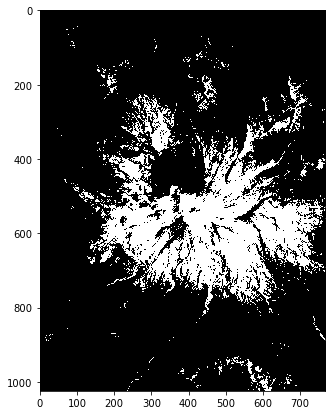

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(mask, cmap='binary_r')

plt.show()

### Now let's try this on real data:

Rough threshold values for snow:
- R > 1000, channel 2
- G > 1000, channel 1
- B > 1000, channel 0
- NIR < 100, channel 3

Reading in data will result in an array of the shape (4, 8000, 8000).

We are going to start with the green band where snow is the most reflective.

In [13]:
import os

In [14]:
data_dir = '../../data/'

filenames = os.listdir(data_dir)

In [15]:
filename_tifs = []

for filename in filenames:
    if filename.endswith('Analytic_refl.tif'):
        filename_tifs.append(filename)

In [16]:
filename_tifs[:5]

['703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.tif',
 '794418_1060719_2017-09-28_0f35_BGRN_Analytic_refl.tif',
 '2574848_1060718_2019-08-04_0f4e_BGRN_Analytic_refl.tif',
 '2574618_1060618_2019-08-04_0f3d_BGRN_Analytic_refl.tif',
 '2548533_1060719_2019-07-25_0f15_BGRN_Analytic_refl.tif']

In [17]:
filename = data_dir +  '2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif'

data = data_tools.read_raster(filename, band=None)[0]

In [18]:
data.shape

(4, 8000, 8000)

In [19]:
np.shape(data)

(4, 8000, 8000)

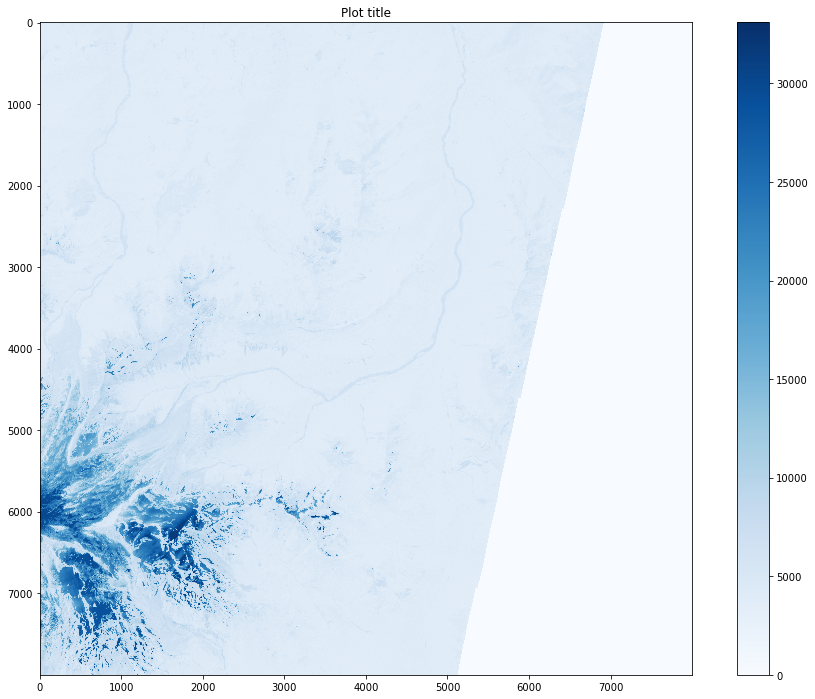

In [20]:
#blue channel
data_tools.plot_me(data[0], cmap='Blues')

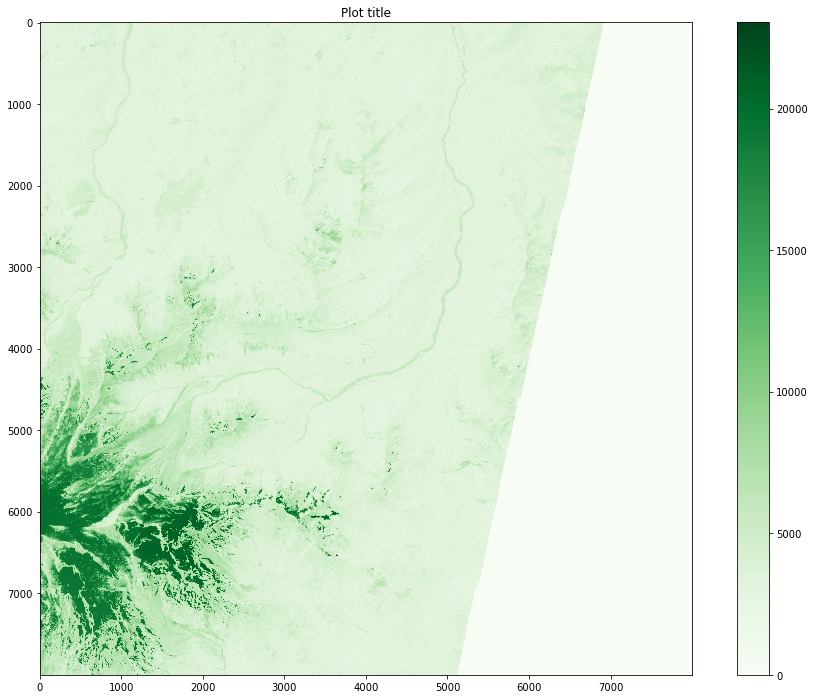

In [21]:
#green channel
data_tools.plot_me(data[1], cmap='Greens')

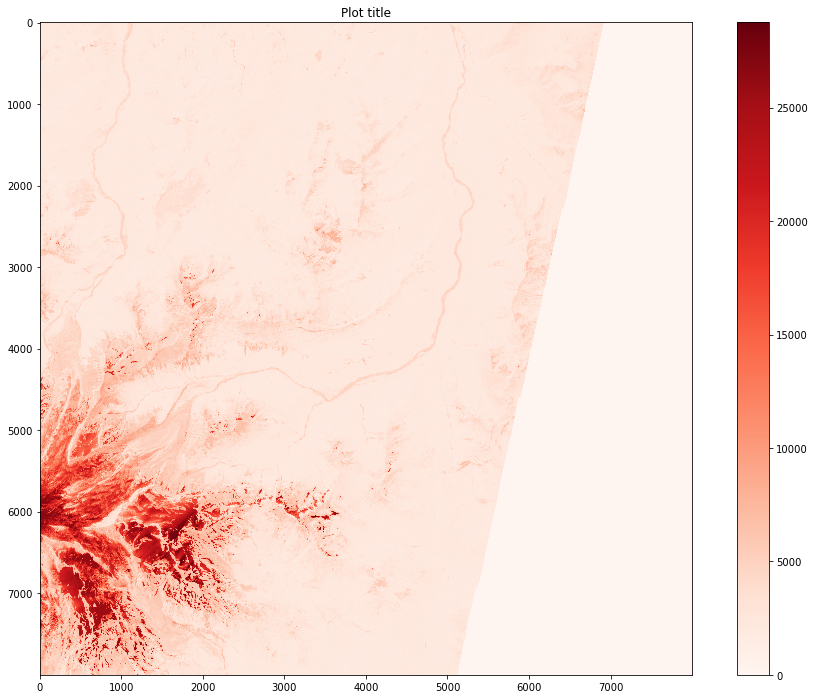

In [22]:
#red channel
data_tools.plot_me(data[2], cmap='Reds')

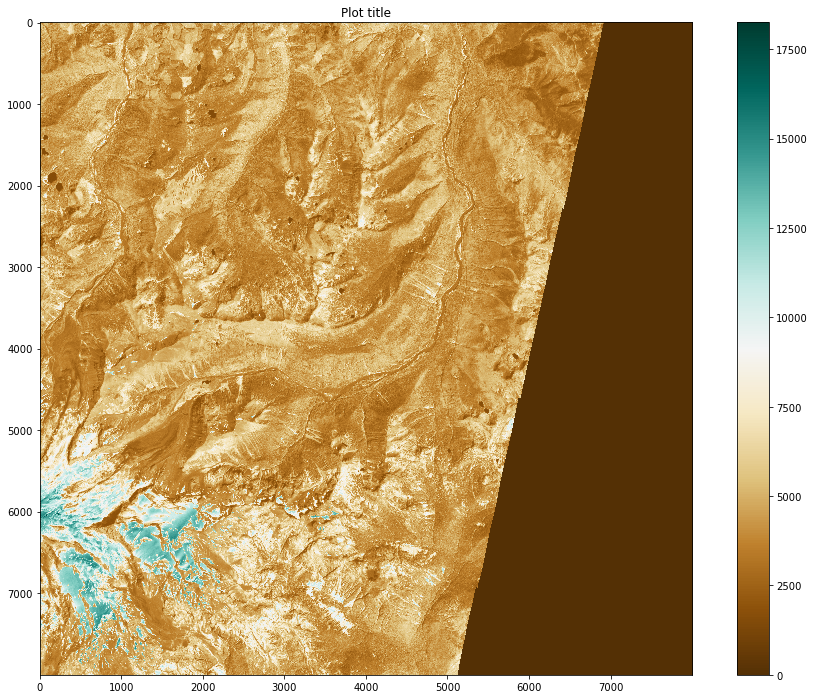

In [23]:
#near-ir
data_tools.plot_me(data[3], cmap='BrBG')

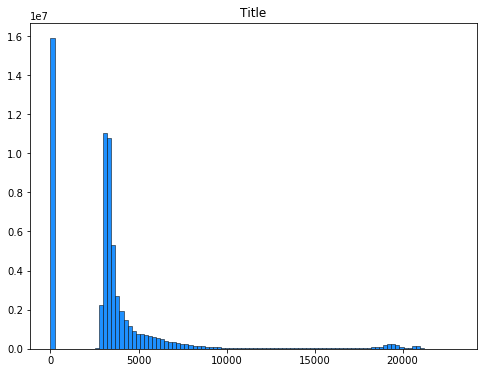

In [24]:
data_tools.histo_me(data[1])

In [25]:
#create masks based on threshold values (found using the histo_me() function)
mask0 = np.zeros(np.shape(data[0]))
mask1 = np.zeros(np.shape(data[1]))
mask2 = np.zeros(np.shape(data[2]))
mask3 = np.zeros(np.shape(data[3]))

#create masks for each channel based on threshold values
mask0[data[0] > 10000] = 1
mask1[data[1] > 15000] = 1
mask2[data[2] > 15000] = 1
mask3[data[3] > 11000] = 1

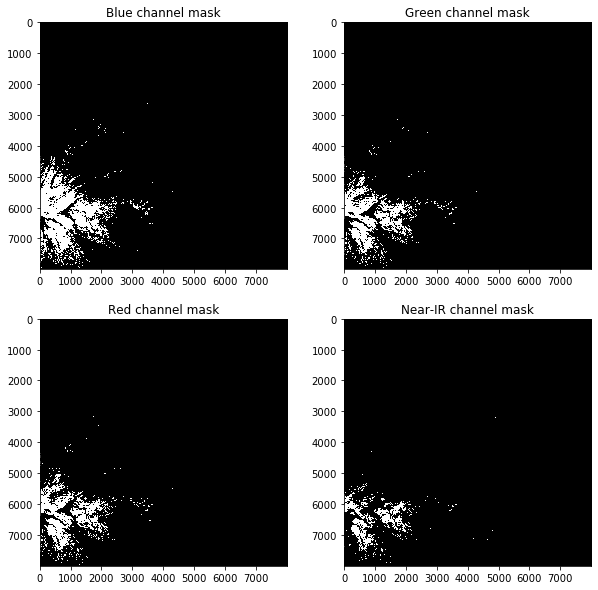

In [26]:
#plot masks to see how choice of threshold values affects data labelling
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(mask0, cmap='binary_r')
ax[0, 1].imshow(mask1, cmap='binary_r')
ax[1, 0].imshow(mask2, cmap='binary_r')
ax[1, 1].imshow(mask3, cmap='binary_r')

ax[0, 0].set_title('Blue channel mask')
ax[0, 1].set_title('Green channel mask')
ax[1, 0].set_title('Red channel mask')
ax[1, 1].set_title('Near-IR channel mask')

plt.show()

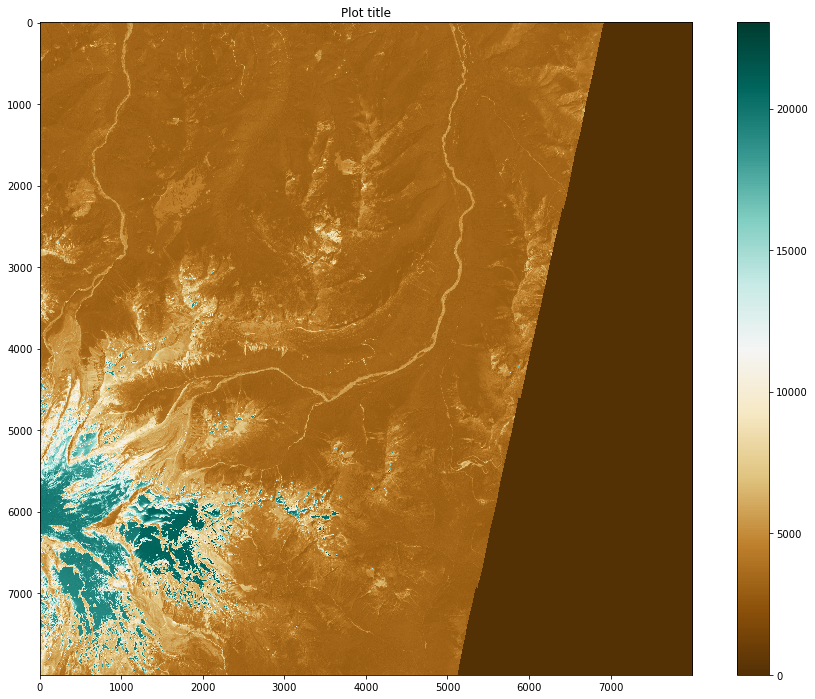

In [54]:
data_tools.plot_me(data[1], cmap='BrBG')